<a href="https://colab.research.google.com/github/berberberk/apnd-fs-2024/blob/main/APND3_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

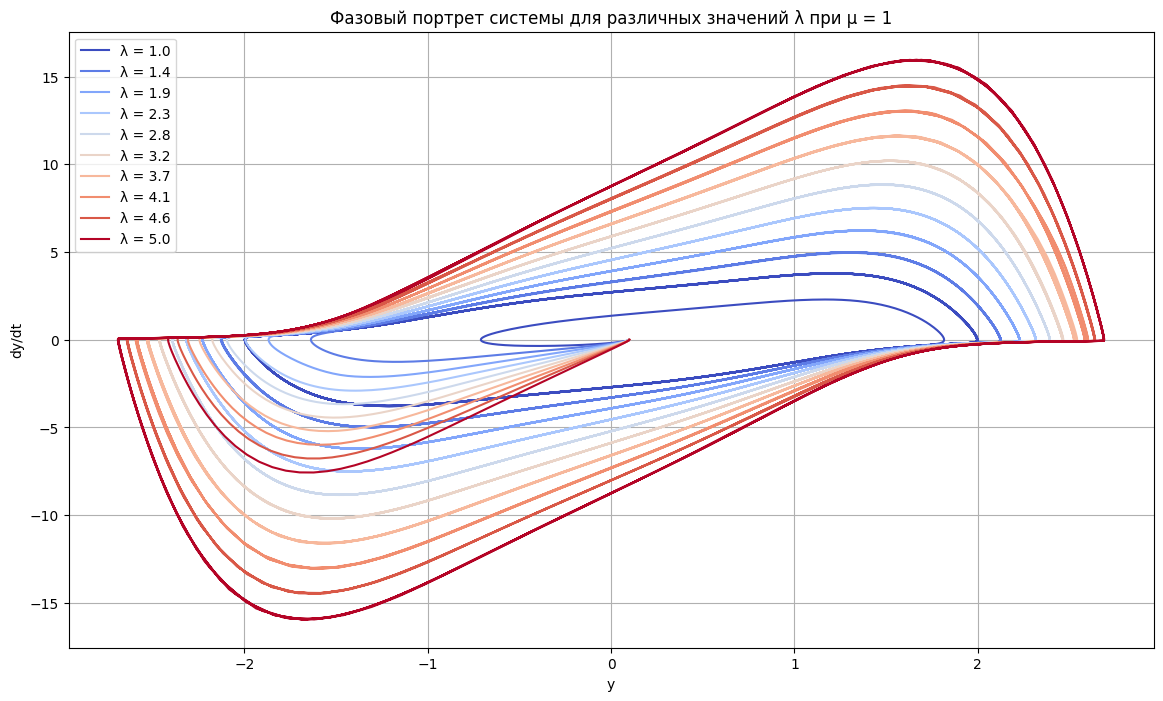

In [16]:
mu = 1.0
lambda_values = np.linspace(1, 5, 10)

def system(t, Y, lambda_, mu):
    y, z = Y
    dydt = z
    dzdt = (lambda_ + mu * y**2 - y**4) * z - y
    return [dydt, dzdt]

y0 = [0.1, 0]
t_span = (0, 100)  # Интервал времени
t_eval = np.linspace(*t_span, 10000)

n = 10
colors = plt.cm.coolwarm(np.linspace(0,1,n))
clr_i = 0

plt.figure(figsize=(14, 8))
for lambda_ in lambda_values:
    sol = solve_ivp(system, t_span, y0, args=(lambda_, mu), t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'λ = {lambda_:.1f}', color=colors[clr_i])
    clr_i += 1

plt.xlabel("y")
plt.ylabel("dy/dt")
plt.title("Фазовый портрет системы для различных значений λ при μ = 1")
plt.legend()
plt.grid(True)
plt.show()


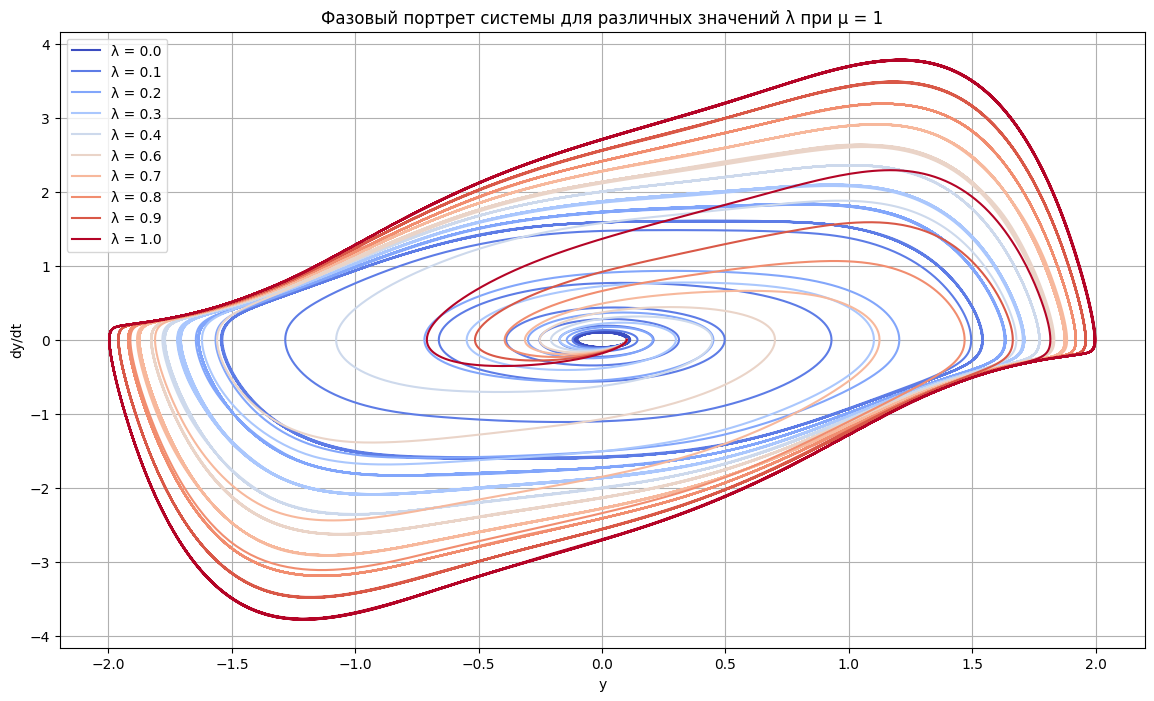

In [19]:
lambda_values = np.linspace(0, 1, 10)
def system(t, Y, lambda_, mu):
    y, z = Y
    dydt = z
    dzdt = (lambda_ + mu * y**2 - y**4) * z - y
    return [dydt, dzdt]

y0 = [0.1, 0]
t_span = (0, 100)  # Интервал времени
t_eval = np.linspace(*t_span, 10000)

n = 10
colors = plt.cm.coolwarm(np.linspace(0,1,n))
clr_i = 0

plt.figure(figsize=(14, 8))
for lambda_ in lambda_values:
    sol = solve_ivp(system, t_span, y0, args=(lambda_, mu), t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'λ = {lambda_:.1f}', c=colors[clr_i])
    clr_i += 1

plt.xlabel("y")
plt.ylabel("dy/dt")
plt.title("Фазовый портрет системы для различных значений λ при μ = 1")
plt.legend()
plt.grid(True)
plt.show()

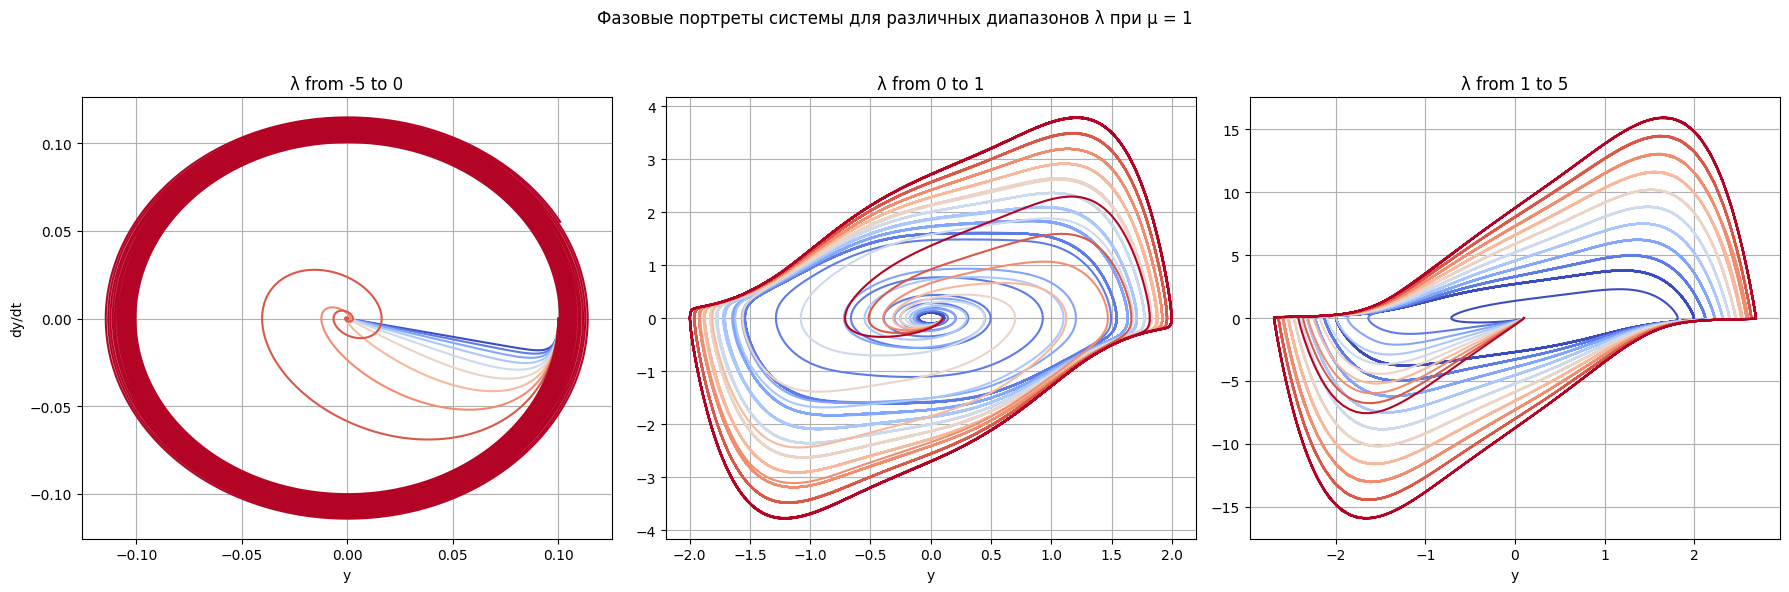

In [22]:
lambda_ranges = [np.linspace(-5, 0, 10), np.linspace(0, 1, 10), np.linspace(1, 5, 10)]

titles = ["λ from -5 to 0", "λ from 0 to 1", "λ from 1 to 5"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for i, (lambdas, title) in enumerate(zip(lambda_ranges, titles)):
    ax = axes[i]
    n = 10
    colors = plt.cm.coolwarm(np.linspace(0,1,n))
    clr_i = 0
    for lambda_ in lambdas:
        sol = solve_ivp(system, t_span, y0, args=(lambda_, mu), t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1], label=f'λ = {lambda_:.1f}', c=colors[clr_i])
        clr_i += 1
    ax.set_title(title)
    ax.set_xlabel("y")
    ax.grid(True)


axes[0].set_ylabel("dy/dt")
plt.suptitle("Фазовые портреты системы для различных диапазонов λ при μ = 1")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()